# Mining Massive Datasets Problem Set 5

Ruben Hartenstein, Taha Erkoc

# Exercise 1

When two different keys hash to the same index in a hash table, we have a hash collision. There are several common mechanisms that are used to resolve hash collisions:

1. Chaining:
Each index inside the hash table stores a linked list of all keys that hash to that index. If a collision occurs, the key-value pair is added to the linked list at that index.

2. Open Adressing:
If a collision occurs, an algorithm probes the hash table for the next available slot (e.g. using linear where it checks the next slot sequentially or quadratic probing where quadratic offsets are used to find the next slot). Unlike in chaining, there is no additional memory needed for linked lists, even though the overall performance can suffer when the table becomes densely populated.

3. Open Hashing (Separate Hash Tables):
Each index inside the hash table stores its own hash table to resolve collisions. This can reduce clustering issues but leads to increased memory usage.


C++, Java and Python all have their own ways to resolve hash collisions.

- C++ (Standard Template Library `std::unordered_map`): Chaining, it uses a bucket array where each bucket contains a linked list or dynamic array of the key-value pairs. Whenever a hash collision occurs, the new key-value pair is added to the bucket corresponding to the hash value. If the load factor (number of elements / number of buckets) surpasses a certain threshold (usually 1), the hash table doubles the size of the bucket arrays and rehashes all its elements.

- Java (`HashMap`): Chaining with Dynamic Resizing, also uses a bucket array where each bucket initially contains a linked list of the key-value pairs. When the number of entries in the bucket surpasses a certain threshold, the linked list in a bucket is converted to a binary search tree for better performance.
Again, after a certain load factor is exceeded, the hash table resizes and all entries are rehashed.

- Python(`dict`): Open adressing with quadratic probing, when a collision occurs, it probes subsequent slots using a quadratic sequence until an empty slot is found or the key is located. Python dictionaries dynamically resize when the table reaches 2/3 of its capacity to maintain performance and ensure that space remains available for probes. During the resizing, all keys are rehashed into the new table.



# Exercise 2

### SHA-256 (Secure Hash Algorithm 256-bit)
- Converts input data into a fixed-length 256-bit hash.
- Commonly used in cryptographic applications like digital signatures and password storage.
### MD5 (Message Digest Algorithm 5)
- Produces a 128-bit hash value.
- Historically used for password hashing but is now considered insecure against brute-force and collision attacks.

### Connection of Hash Functions to Password Security
Hash functions are vital for securely storing passwords because:
1. They transform as password into a fixed-size hash, making the original password irrecoverable.
2. Good hash functions are designed to be:
    - __Deterministic__: Same input always produces the same output:
    - __Non-reversible__: It's computationally infeasible to derive the original input from the hash.
    - __Collision-resistant__: Different inputs should produce unique hashes.

However, if basic hash functions (like unsalted MD5 or SHA-1) are used without additional security measures, they bacome vulnerable to rainbow table attacks.

### Rainbow Table
A rainbow table is a precomputed table of hashes for a large set of possible passwords. It is used to reverse-engineer hashed passwords by looking up their hash values:
- Trade-off: Reduces computational cost of cracking hashes by using storage space.
- Threat: Enables attackers to match hash values quickly to their plaintext equivalents, especially for commonly used passwords.

### Salt
Salt is a random string of data added to a password before hashing it. Its purpose is to:
1. Ensure that even if two users have the same password, their hashes will be unique.
2. Defeat precomputed rainbow tables, as the salt must also be known to match the hash.

# Exercise 3

### Internal Data Structure
1.  Buckets
    -   The HashMap uses an array (`Node<K,V>[] table`) to store key-value pairs. Each element in the array represents a bucket.
2.  Node Class
    -   Each bucket contains a `Node` object that stores:
        -   `key`: The key of the mapping.
        -   `value`: The associated value.
        -   `hash`: The hash code of the key.
        -   `next`: A reference to the next node in the bucket (for collision handling via chaining).
3.  Tree Nodes
    -   If the number of entries in a bucket exceeds the `TREEIFY_THRESHOLD` (8 by default) the bucket switches to a tree structure (red-black tree). This improves the efficiency of operations from $O(n)$ to $O(log(n))$.
### Adding a `<Key, Value>` Pair
1. Hash Computation
    -   A key's hash code is computed using `hash(key)` which applies a transformation to reduce collisions.
2. Bucket Index
    - The bucket index is calculated using `index = (hash & (table.length - 1))`.
3.  Collision Handling:
    -   If the bucket at the computed index is empty, a new node is placed directly.
    -   If the bucket already has entries:
        - The chain of nodes is traversed using `Node.next` to find an existing key or reach the end.
        -   If the key exists (determined using `equals()`), its value is updated.
        -   Otherwise, a new node is appended at the end of the chain.
    -   If the chain lenght exceeds `TREEIFY_THRESHOLD`, the chain is converted into a red-black tree.
4. Rehashing
    -   If the number of entries exceeds the threshold (capacity * load factor), the table is resized (doubled), and the entries are rehashed to redistribute them across the new buckets.
### Retrieving an Entry
1. Hash Computation and Index Lookup:
    -   The key's hash is computed, and the bucket index is determined.
2. Bucket Traversal:
    -   The bucket at the computed index is traversed:
        - If the bucket is a linked list, the nodes are scanned sequentially, comparing the key using `equals()`
        - If the bucket is a tree, a tree search is performed based on the key's hash and order (if keys are comparable).
3. Return Value:
    - If a matching key is found, its value is returned.
    - If no match is found `null` is returned.


# Exercise 4

1. MurmurHash3:
    -   Description: A non-cryptographic hash function that provides high-quality, uniformly distributed hash values.
    - Justification: MurmurHash3 is widely used for its speed and high-quality hash distribution. It provides good mixing properties and is robust against clustering, making it ideal for Bloom filters.
2. FNV-1a (Fowler-Noll-Vo):
    -   Description: A lightweight hash function that sues a prime multiplier for dispersion and processes input byte-by-byte.
    - Justification: FNV-1a is simple, fast and produces distinct hash values due to its unique multiplier. Its design complements MurmurHash3 in terms of computation and output.
3. CityHash:
    -   Description: A hash function designed by Google for fast processing of strings, optimized for low-latency applications.
    - Justification: CityHash offers a good tradeoff between speed and uniformity of hash values. Its implementation uses techniques like hashing chunks of data efficiently, which differ significantly from MurmurHash3 and FNV-1a.

Each hash function employs distinct approaches for combining and distributing input data (bit-mixing, prime-based linear methods and block hashing). Their differing internal designs minimize the likelihood of correlated outputs for similar inputs and therefore reducing false positives. 

# Exercise 5

### a)
The probability formula for a random element hashing to a specific bit in the Bloom filter is: $P(hit) = \frac{1}{n}$

Where $n = 5$ (number of bits in the array). Thus, the probability that a random element gets hashed to a given bit is: $P(hit) = \frac{1}{5} = 20\%$.

This probability arises because each bit in the bit array is equally likely to be chosen by the hash function of a random element, assuming the hash function distributes values uniformly.

### b)
$h_1(x) = x\ mod\ 5$<br>
$h_2(x) = (2x + 3)\ mod\ 5$


For $x = 4$:


$h_1(4) = 4\ mod\ 5 = 4$<br>
$h_2(4) = 11\ mod\ 5 = 1$<br>

|  0   |  1   |  2   |  3   |  4   |
|-----|-----|-----|-----|-----|
| 0 | 1 | 0 | 0 | 1 |


For $x = 1$:


$h_1(4) = 1\ mod\ 5 = 1$<br>
$h_2(4) = 5\ mod\ 5 = 0$<br>

|  0   |  1   |  2   |  3   |  4   |
|-----|-----|-----|-----|-----|
| 1 | 1 | 0 | 0 | 1 |

Every bit is equally likely to be hit by the two hash functions if the input values are uniformly distributed.
- $h_1(x)$ simply maps $x$ to its remainder when divided by 5. Since it cylcles through all possible values as $x$ increases, it uniformly distributes across the 5 bits if $x$ itself is uniformly distributed.
- $h_2(x)$ also distributes the values uniformly since the GCD of 2 and 5 is 1 (2 is relatively prime to 5 since they're both prime numbers). This property ensures that the mapping $2x\ mod\ 5$ generates a complete cycle over all residues before repeating. Adding 3 doesn't change the uniformity but merely shifts the sequence cyclically.


### c)
$P_{false\ positive} = (1 - e^{-\frac{k*n}{m}})^k$

Where:
- $k = 2$ (number of hash functions)
- $n = 2$ (number of elements inserted)
- $m = 5$ (size of the bit array)

The fraction of 1s in the bit array is determined by $1 - e^{-\frac{k*n}{m}} = 0,551$. Thus, approximaltey $55,1\%$ of the bits are expected to be set, resulting in a $P_{false\ positive} = (0,551)^2 = 0,304$.

The false positive probability is approximatley $30,4\%$. This means that for any random number checked against the Bloom filter, there is about a $30,4\%$ chance it will falsely appear to be in the set.

# Exercise 6

### a)

The optimal number of hash functions $k$ is given by

$k = \frac{n}{m} * ln(2)$

Where:

- $n$: size of the bit array
- $m$: number of elements in the set

Now we plot the values for $n = m, 2m, ..., 20m$

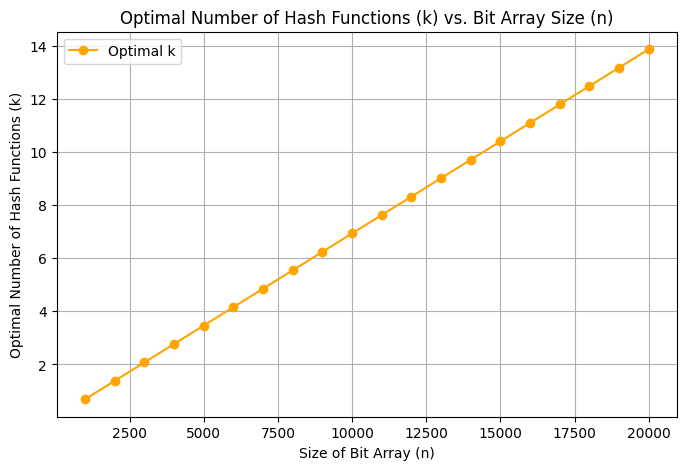

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m = 1000  # Number of elements in the set

# Generate values for n: n = m, 2m, ..., 20m
n_values = np.arange(m, 21 * m, m)

# Compute k for each n using the formula: k = (n / m) * ln(2)
k = (n_values / m) * np.log(2)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_values, k, marker='o', linestyle='-', color='orange', label='Optimal k')
plt.title('Optimal Number of Hash Functions (k) vs. Bit Array Size (n)')
plt.xlabel('Size of Bit Array (n)')
plt.ylabel('Optimal Number of Hash Functions (k)')
plt.grid(True)
plt.legend()
plt.show()

The optimal $k$ increases linearly with $n$, as expected

### b)

The formula to calculate the false-positive probability is $P_{false\ positive} = (1 - e^{-\frac{k*m}{n}})^k$, which we bound by $b$



From __a)__ we know that $k = \frac{n}{m} * ln(2)$. If we insert $k$ into the above formula, we get:

$b = \left(1 - e^{-\ln(2)}\right)^{\frac{n}{m} \ln(2)}$

Since $1 - e^{-\ln(2)} \approx 0.5$:

$b = 0.5^{\frac{n}{m} \ln(2)}$

<br />

Solving the formula for $n$, we receive:


$n = m * \frac{\ln(b)}{\ln(0.5) * \ln(2)}$

<br />

Now calculate $n$ ($k$) for $b_1$, $b_2$ and $b_3$

$b_1 = 0.01$: 

$n \approx 9585$, $k = 7$

Calculating back $b$ with $n$ and $k$ gives us $b \approx 0.01$

<br />

$b_2 = 0.005$: 

$n \approx 11028$, $k = 8$

Calculating back $b$ with $n$ and $k$ gives us $b \approx 0.005$

<br />

$b_3 = 0.001$: 

$n \approx 14378$, $k = 10$

Calculating back $b$ with $n$ and $k$ gives us $b \approx 0.001$

<br />

The formula doesn't require the exact value of $m$, as the ratio $\frac{n}{𝑚}$ is all that matters.

# Exercise 7

For a Bloom filter, the false positive probability $b$ is given by:

$b = (1 - e^{-\frac{k*m}{n}})^k$

We now want to find $k$ such that it minimizes $b$, which means we minimize $b$ with respect to $k$.


To do that, we first, take the natural logarithm

$\ln(b) = k * \ln(1 - e^{-\frac{k*m}{n}})$

Now we differentiate $\ln(b)$ with respect to $k$

<br />

$\frac{d}{dk}\ln(b) = \ln(1 - e^{-\frac{k*m}{n}}) + k * \frac{1}{1 - e^{-\frac{k*m}{n}}} * (-\frac{m}{n} * e^{-\frac{k*m}{n}})$

<br />

By setting this derivative to 0 and solving numerically/anatically, the optimal $k$ becomes:

$k = \frac{n}{m} * ln(2)$

This $k$ minimizes collisions while maximizing the effective use of bits.

# Exercise 8

The data has the schema:

$Grades(university, courseID, studentID, grade)$

### a) For each university, the average number of students in a course

Key attributes = `university`, `courseID`

The number of students in a course depends on the courses within each university, therefore we need to sample __universities__ and __courseID__ to ensure that all courses and students within a university are included in the sample.


### b) Fraction of students, who have an average grade of 2.0 or better

Key attributes = `university`, `studentID`

We need to sample the students across all universities to approximate their average grade. By sampling on __studentID__ and __university__, we get a uniform sample of the students where each student is uniquely identified within the sample.

### c) Fraction of courses where at least half of the students got the grade 1.7 or better
Key attributes = `university`, `courseID`

The sampling must preserve the student to course mapping. By sampling on `courseID`, we ensure all students in a course are included in the sample.